In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-processing-data/icecream.jpg
/kaggle/input/image-processing-data/10card.png
/kaggle/input/image-processing-data/big10.png
/kaggle/input/image-processing-data/object.png
/kaggle/input/image-processing-data/Finding/1_8.jpg
/kaggle/input/image-processing-data/Finding/1_3.jpg
/kaggle/input/image-processing-data/Finding/2_3.jpg
/kaggle/input/image-processing-data/Finding/2_4.jpg
/kaggle/input/image-processing-data/Finding/1_7.jpg
/kaggle/input/image-processing-data/Finding/img_3 (copy).jpg
/kaggle/input/image-processing-data/Finding/1.jpg
/kaggle/input/image-processing-data/Finding/1_9.jpg
/kaggle/input/image-processing-data/Finding/1_4.jpg
/kaggle/input/image-processing-data/Finding/2_2.jpg
/kaggle/input/image-processing-data/Finding/1_10.jpg
/kaggle/input/image-processing-data/Finding/1_11.jpg
/kaggle/input/image-processing-data/Finding/1_1.jpg
/kaggle/input/image-processing-data/Finding/1_6.jpg
/kaggle/input/image-processing-data/Finding/1_5.jpg
/kaggle/input/image-pr

In [2]:
!pip install opencv-contrib-python
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=e78a63ab539734ccf5059cc977983034f2f832333e769c03175ea7aa3e34819b
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [6]:
import cv2 
import matplotlib.pyplot as plt
import imutils

def imshow(img, figsize=(6, 6), title=""):
    fig, ax = plt.subplots(1, 1, figsize=(figsize))
    ax.set_title(title)
    ax.axis('off')
    ax.imshow(img)
    plt.close()

def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    
    iou = inter_area / (box1_area + box2_area - inter_area)
    
    return iou
    
img = cv2.imread('/kaggle/input/image-processing-data/10card.png')
#Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/kaggle/input/image-processing-data/object.png', 0)
w, h = template.shape[1], template.shape[0]
template_height, template_width = h, w
imshow(img)
imshow(template)
print(img.shape)
print(template.shape)

(1500, 1200, 3)
(310, 240)


In [7]:
res = cv2.matchTemplate(img_gray,template, cv2.TM_CCOEFF_NORMED)
imshow(res)

(1000, 1000, 3)
0.088889636


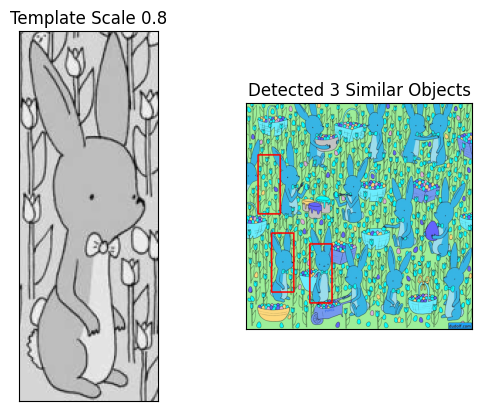

0.10509654


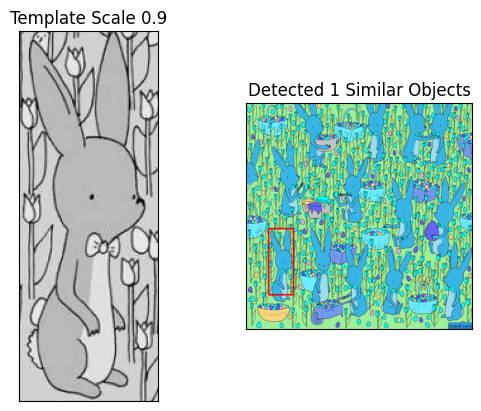

0.9812277


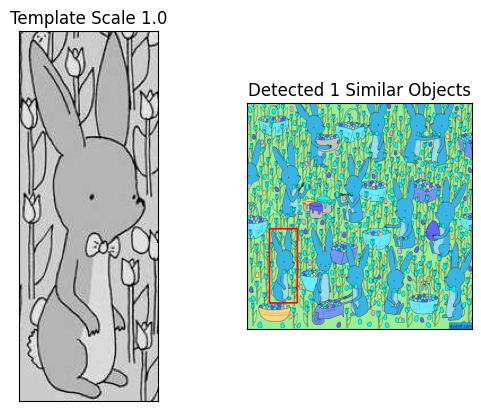

0.09686161


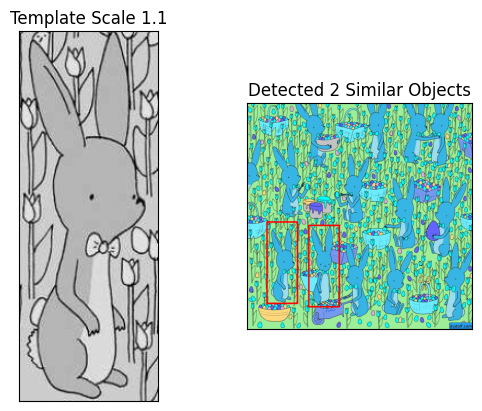

0.06550442


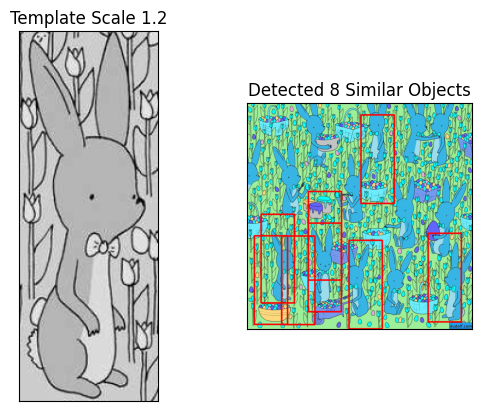

In [20]:
img = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit.jpeg')
print(img.shape)
IOU_THRESHOLD = 0.5
def constrast(img):
    mean_value = np.mean(img)
    
    mean_subtracted_image = img - mean_value

    return np.float32(mean_subtracted_image)

origin_template = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit_template.jpeg', 0)
for scale in np.linspace(0.8, 1.2, 5):
    template = imutils.resize(origin_template, width=int(origin_template.shape[1] * scale))

#     origin_template = cv2.imread(f'/kaggle/input/image-processing-data/icecream.jpg', 0)



#     for flip in range(3):
#         for _ in range(4):

#             edged = cv2.Canny(resized, 50, 200)
    img = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit.jpeg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    alpha = 0.1
    beta = 50
#     blurred_image = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
#     blurred_template = cv2.convertScaleAbs(template, alpha=alpha, beta=beta)    
    blurred_image = constrast(img_gray)
    blurred_template = constrast(template)
#     blurred_image = cv2.equalizeHist(blurred_image)
#     blurred_template = cv2.equalizeHist(blurred_template)

#         imshow(blurred_template)
#         imshow(blurred_image)
    res = cv2.matchTemplate(blurred_image, blurred_template, cv2.TM_CCOEFF_NORMED)

#         res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                 imshow(res)
    threshold = np.max(res)
    loc_2 = np.where(res >= threshold-0.01)

    if len(loc_2[0]) == 0:
        continue
    print(threshold)
    detections = []
    template_width, template_height = template.shape[1], template.shape[0]
    for y, x in zip(loc_2[0], loc_2[1]):
        detected_box = (x, y, x + template_width, y + template_height)
        is_duplicate = False
        for existing_box in detections:
            iou = compute_iou(detected_box, existing_box)
            if iou > IOU_THRESHOLD:
                is_duplicate = True
                break

        if not is_duplicate:
            detections.append(detected_box)
            cv2.rectangle(img, (x, y), (x + template_width, y + template_height), (255, 0, 0), 5)
    plt.subplot(121), plt.imshow(template, cmap='gray')
    plt.title(f'Template Scale {scale}'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title(f'Detected {len(detections)} Similar Objects'), plt.xticks([]), plt.yticks([])
    plt.show()
    plt.close()

#             template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)

#         if flip<2:
#             template = cv2.flip(origin_template, flip)


0.59215546


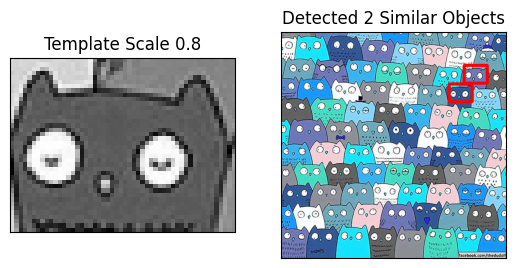

0.5990942


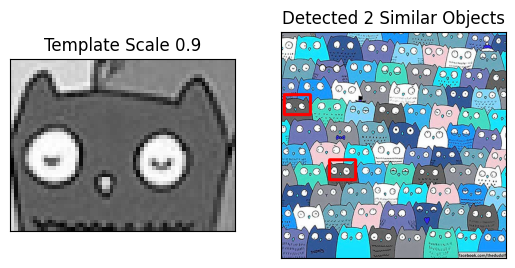

0.9990409


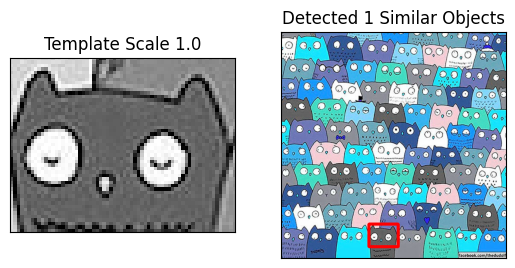

0.5720508


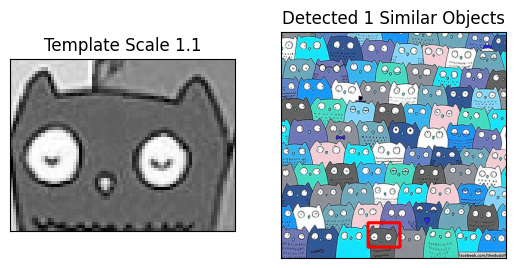

0.38877133


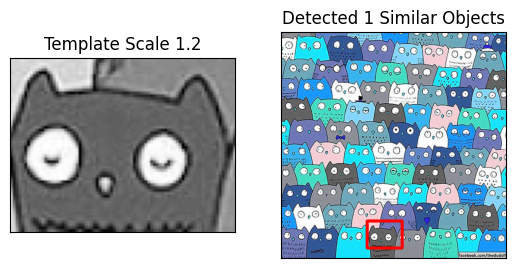

In [21]:

IOU_THRESHOLD = 0.5
def constrast(img):
    mean_value = np.mean(img)
    
    mean_subtracted_image = img - mean_value

    return np.float32(mean_subtracted_image)

origin_template = cv2.imread('/kaggle/input/image-processing-data/Counting/cat_template.jpg', 0)
for scale in np.linspace(0.8, 1.2, 5):
    template = imutils.resize(origin_template, width=int(origin_template.shape[1] * scale))

#     origin_template = cv2.imread(f'/kaggle/input/image-processing-data/icecream.jpg', 0)



#     for flip in range(3):
#         for _ in range(4):

#             edged = cv2.Canny(resized, 50, 200)
    img = cv2.imread('/kaggle/input/image-processing-data/Counting/cat.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    alpha = 0.1
    beta = 50
#     blurred_image = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
#     blurred_template = cv2.convertScaleAbs(template, alpha=alpha, beta=beta)    
    blurred_image = constrast(img_gray)
    blurred_template = constrast(template)
#     blurred_image = cv2.equalizeHist(blurred_image)
#     blurred_template = cv2.equalizeHist(blurred_template)

#         imshow(blurred_template)
#         imshow(blurred_image)
    res = cv2.matchTemplate(blurred_image, blurred_template, cv2.TM_CCOEFF_NORMED)

#         res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                 imshow(res)
    threshold = np.max(res)
    loc_2 = np.where(res >= threshold-0.01)

    if len(loc_2[0]) == 0:
        continue
    print(threshold)
    detections = []
    template_width, template_height = template.shape[1], template.shape[0]
    for y, x in zip(loc_2[0], loc_2[1]):
        detected_box = (x, y, x + template_width, y + template_height)
        is_duplicate = False
        for existing_box in detections:
            iou = compute_iou(detected_box, existing_box)
            if iou > IOU_THRESHOLD:
                is_duplicate = True
                break

        if not is_duplicate:
            detections.append(detected_box)
            cv2.rectangle(img, (x, y), (x + template_width, y + template_height), (255, 0, 0), 5)
    plt.subplot(121), plt.imshow(template, cmap='gray')
    plt.title(f'Template Scale {scale}'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title(f'Detected {len(detections)} Similar Objects'), plt.xticks([]), plt.yticks([])
    plt.show()
    plt.close()

#             template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)

#         if flip<2:
#             template = cv2.flip(origin_template, flip)


0.39526677


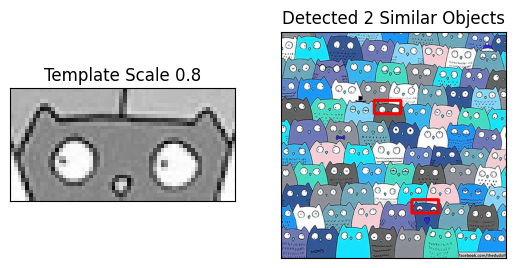

0.51448405


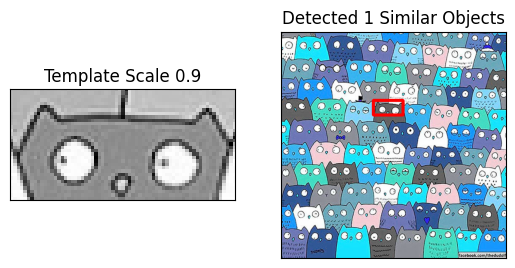

0.99891955


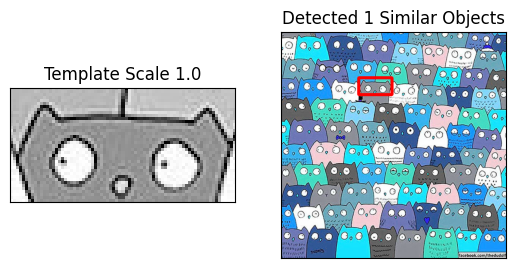

0.44400147


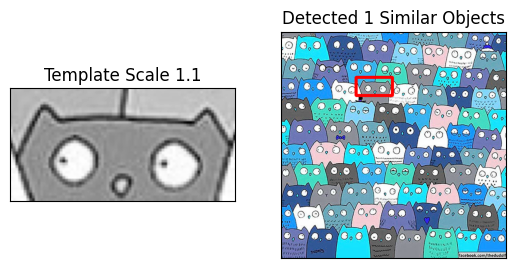

0.35202527


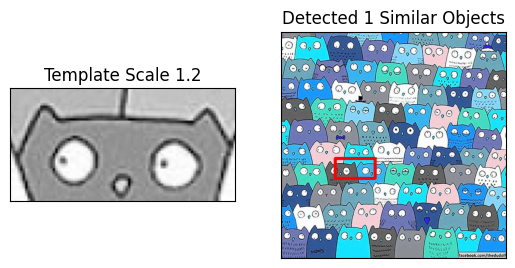

In [22]:

IOU_THRESHOLD = 0.5
def constrast(img):
    mean_value = np.mean(img)
    
    mean_subtracted_image = img - mean_value

    return np.float32(mean_subtracted_image)

origin_template = cv2.imread('/kaggle/input/image-processing-data/Counting/cat_template_1.jpg', 0)
for scale in np.linspace(0.8, 1.2, 5):
    template = imutils.resize(origin_template, width=int(origin_template.shape[1] * scale))

#     origin_template = cv2.imread(f'/kaggle/input/image-processing-data/icecream.jpg', 0)



#     for flip in range(3):
#         for _ in range(4):

#             edged = cv2.Canny(resized, 50, 200)
    img = cv2.imread('/kaggle/input/image-processing-data/Counting/cat.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    alpha = 0.1
    beta = 50
#     blurred_image = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
#     blurred_template = cv2.convertScaleAbs(template, alpha=alpha, beta=beta)    
    blurred_image = constrast(img_gray)
    blurred_template = constrast(template)
#     blurred_image = cv2.equalizeHist(blurred_image)
#     blurred_template = cv2.equalizeHist(blurred_template)

#         imshow(blurred_template)
#         imshow(blurred_image)
    res = cv2.matchTemplate(blurred_image, blurred_template, cv2.TM_CCOEFF_NORMED)

#         res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                 imshow(res)
    threshold = np.max(res)
    loc_2 = np.where(res >= threshold-0.01)

    if len(loc_2[0]) == 0:
        continue
    print(threshold)
    detections = []
    template_width, template_height = template.shape[1], template.shape[0]
    for y, x in zip(loc_2[0], loc_2[1]):
        detected_box = (x, y, x + template_width, y + template_height)
        is_duplicate = False
        for existing_box in detections:
            iou = compute_iou(detected_box, existing_box)
            if iou > IOU_THRESHOLD:
                is_duplicate = True
                break

        if not is_duplicate:
            detections.append(detected_box)
            cv2.rectangle(img, (x, y), (x + template_width, y + template_height), (255, 0, 0), 5)
    plt.subplot(121), plt.imshow(template, cmap='gray')
    plt.title(f'Template Scale {scale}'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title(f'Detected {len(detections)} Similar Objects'), plt.xticks([]), plt.yticks([])
    plt.show()
    plt.close()

#             template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)

#         if flip<2:
#             template = cv2.flip(origin_template, flip)


0.4467343


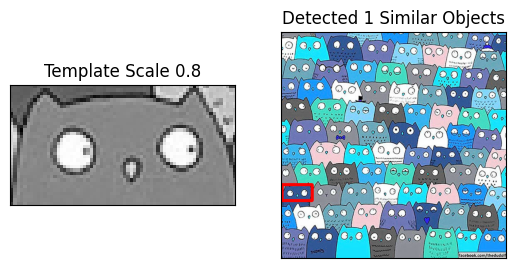

0.4563721


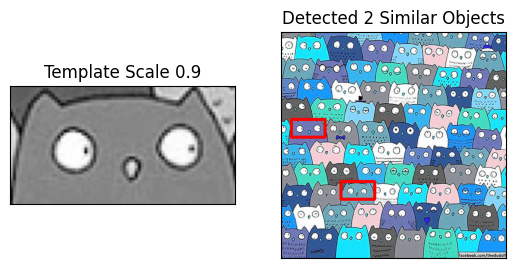

0.9987729


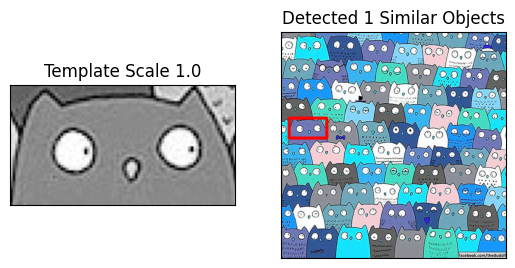

0.4236635


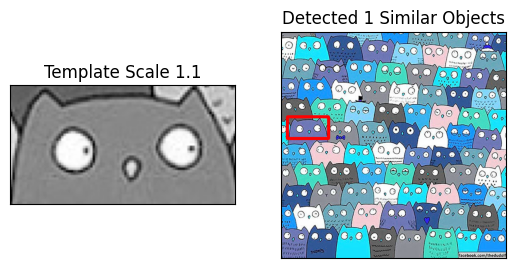

0.29188296


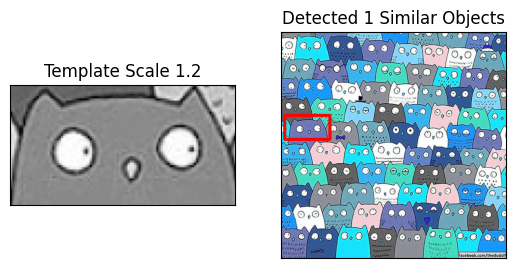

In [23]:

IOU_THRESHOLD = 0.5
def constrast(img):
    mean_value = np.mean(img)
    
    mean_subtracted_image = img - mean_value

    return np.float32(mean_subtracted_image)

origin_template = cv2.imread('/kaggle/input/image-processing-data/Counting/cat_template_2.jpg', 0)
for scale in np.linspace(0.8, 1.2, 5):
    template = imutils.resize(origin_template, width=int(origin_template.shape[1] * scale))

#     origin_template = cv2.imread(f'/kaggle/input/image-processing-data/icecream.jpg', 0)



#     for flip in range(3):
#         for _ in range(4):

#             edged = cv2.Canny(resized, 50, 200)
    img = cv2.imread('/kaggle/input/image-processing-data/Counting/cat.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    alpha = 0.1
    beta = 50
#     blurred_image = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
#     blurred_template = cv2.convertScaleAbs(template, alpha=alpha, beta=beta)    
    blurred_image = constrast(img_gray)
    blurred_template = constrast(template)
#     blurred_image = cv2.equalizeHist(blurred_image)
#     blurred_template = cv2.equalizeHist(blurred_template)

#         imshow(blurred_template)
#         imshow(blurred_image)
    res = cv2.matchTemplate(blurred_image, blurred_template, cv2.TM_CCOEFF_NORMED)

#         res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                 imshow(res)
    threshold = np.max(res)
    loc_2 = np.where(res >= threshold-0.01)

    if len(loc_2[0]) == 0:
        continue
    print(threshold)
    detections = []
    template_width, template_height = template.shape[1], template.shape[0]
    for y, x in zip(loc_2[0], loc_2[1]):
        detected_box = (x, y, x + template_width, y + template_height)
        is_duplicate = False
        for existing_box in detections:
            iou = compute_iou(detected_box, existing_box)
            if iou > IOU_THRESHOLD:
                is_duplicate = True
                break

        if not is_duplicate:
            detections.append(detected_box)
            cv2.rectangle(img, (x, y), (x + template_width, y + template_height), (255, 0, 0), 5)
    plt.subplot(121), plt.imshow(template, cmap='gray')
    plt.title(f'Template Scale {scale}'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title(f'Detected {len(detections)} Similar Objects'), plt.xticks([]), plt.yticks([])
    plt.show()
    plt.close()

#             template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)

#         if flip<2:
#             template = cv2.flip(origin_template, flip)


0.53786683


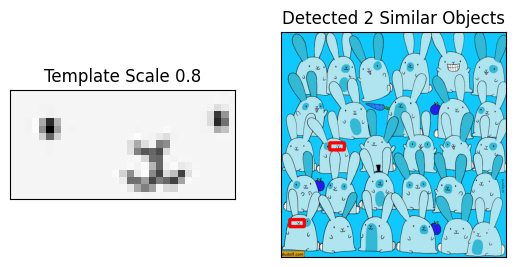

0.5829859


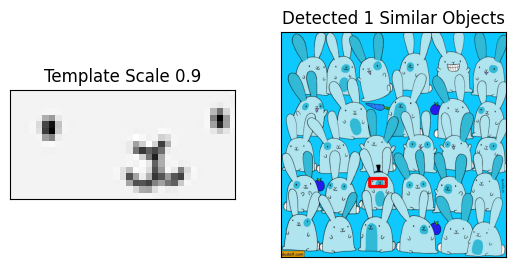

0.9999797


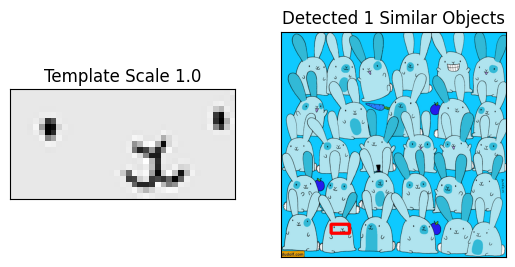

0.75706345


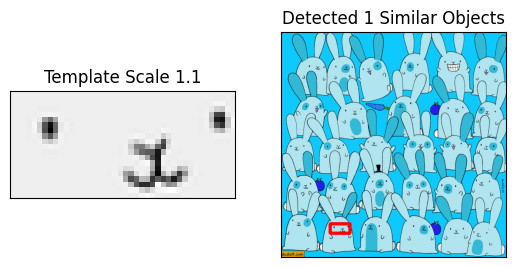

0.4985071


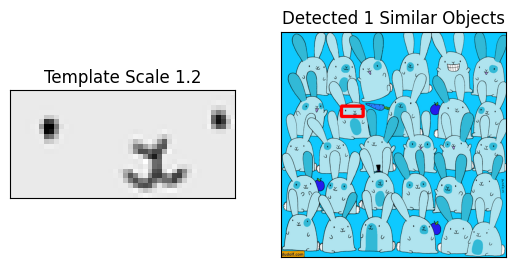

In [26]:

IOU_THRESHOLD = 0.5
def constrast(img):
    mean_value = np.mean(img)
    
    mean_subtracted_image = img - mean_value

    return np.float32(mean_subtracted_image)

origin_template = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit2_1.png', 0)
for scale in np.linspace(0.8, 1.2, 5):
    template = imutils.resize(origin_template, width=int(origin_template.shape[1] * scale))

#     origin_template = cv2.imread(f'/kaggle/input/image-processing-data/icecream.jpg', 0)



#     for flip in range(3):
#         for _ in range(4):

#             edged = cv2.Canny(resized, 50, 200)
    img = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit2.png')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    alpha = 0.1
    beta = 50
#     blurred_image = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
#     blurred_template = cv2.convertScaleAbs(template, alpha=alpha, beta=beta)    
    blurred_image = constrast(img_gray)
    blurred_template = constrast(template)
#     blurred_image = cv2.equalizeHist(blurred_image)
#     blurred_template = cv2.equalizeHist(blurred_template)

#         imshow(blurred_template)
#         imshow(blurred_image)
    res = cv2.matchTemplate(blurred_image, blurred_template, cv2.TM_CCOEFF_NORMED)

#         res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                 imshow(res)
    threshold = np.max(res)
    loc_2 = np.where(res >= threshold-0.01)

    if len(loc_2[0]) == 0:
        continue
    print(threshold)
    detections = []
    template_width, template_height = template.shape[1], template.shape[0]
    for y, x in zip(loc_2[0], loc_2[1]):
        detected_box = (x, y, x + template_width, y + template_height)
        is_duplicate = False
        for existing_box in detections:
            iou = compute_iou(detected_box, existing_box)
            if iou > IOU_THRESHOLD:
                is_duplicate = True
                break

        if not is_duplicate:
            detections.append(detected_box)
            cv2.rectangle(img, (x, y), (x + template_width, y + template_height), (255, 0, 0), 5)
    plt.subplot(121), plt.imshow(template, cmap='gray')
    plt.title(f'Template Scale {scale}'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title(f'Detected {len(detections)} Similar Objects'), plt.xticks([]), plt.yticks([])
    plt.show()
    plt.close()

#             template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)

#         if flip<2:
#             template = cv2.flip(origin_template, flip)


0.3253462


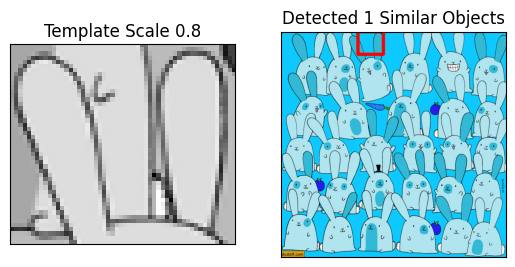

0.37483057


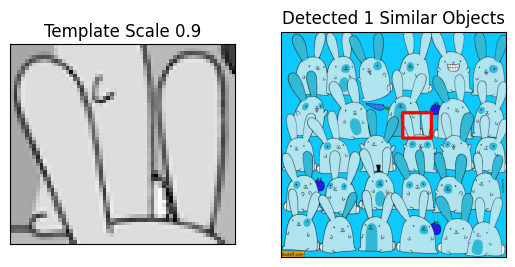

0.99996835


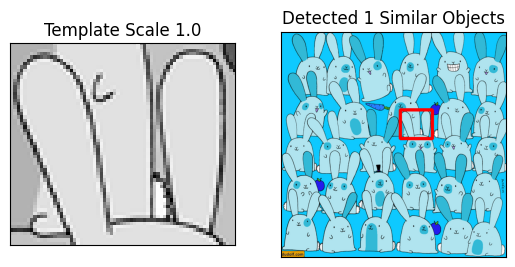

0.45238546


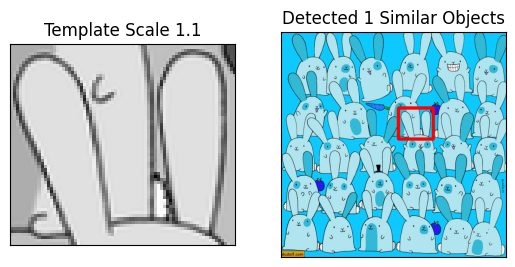

0.33912286


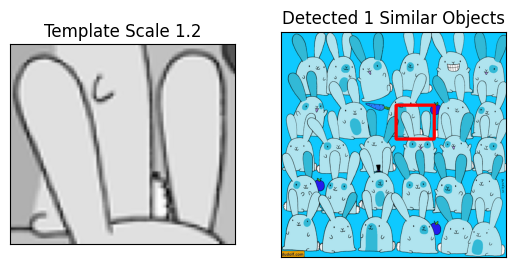

In [27]:

IOU_THRESHOLD = 0.5
def constrast(img):
    mean_value = np.mean(img)
    
    mean_subtracted_image = img - mean_value

    return np.float32(mean_subtracted_image)

origin_template = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit2_2.png', 0)
for scale in np.linspace(0.8, 1.2, 5):
    template = imutils.resize(origin_template, width=int(origin_template.shape[1] * scale))

#     origin_template = cv2.imread(f'/kaggle/input/image-processing-data/icecream.jpg', 0)



#     for flip in range(3):
#         for _ in range(4):

#             edged = cv2.Canny(resized, 50, 200)
    img = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit2.png')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    alpha = 0.1
    beta = 50
#     blurred_image = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
#     blurred_template = cv2.convertScaleAbs(template, alpha=alpha, beta=beta)    
    blurred_image = constrast(img_gray)
    blurred_template = constrast(template)
#     blurred_image = cv2.equalizeHist(blurred_image)
#     blurred_template = cv2.equalizeHist(blurred_template)

#         imshow(blurred_template)
#         imshow(blurred_image)
    res = cv2.matchTemplate(blurred_image, blurred_template, cv2.TM_CCOEFF_NORMED)

#         res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                 imshow(res)
    threshold = np.max(res)
    loc_2 = np.where(res >= threshold-0.01)

    if len(loc_2[0]) == 0:
        continue
    print(threshold)
    detections = []
    template_width, template_height = template.shape[1], template.shape[0]
    for y, x in zip(loc_2[0], loc_2[1]):
        detected_box = (x, y, x + template_width, y + template_height)
        is_duplicate = False
        for existing_box in detections:
            iou = compute_iou(detected_box, existing_box)
            if iou > IOU_THRESHOLD:
                is_duplicate = True
                break

        if not is_duplicate:
            detections.append(detected_box)
            cv2.rectangle(img, (x, y), (x + template_width, y + template_height), (255, 0, 0), 5)
    plt.subplot(121), plt.imshow(template, cmap='gray')
    plt.title(f'Template Scale {scale}'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title(f'Detected {len(detections)} Similar Objects'), plt.xticks([]), plt.yticks([])
    plt.show()
    plt.close()

#             template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)

#         if flip<2:
#             template = cv2.flip(origin_template, flip)
